In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Generate input data

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [38]:
warnings.simplefilter(action='ignore')

In [39]:
np.random.seed(42)

In [40]:
m = 500
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)

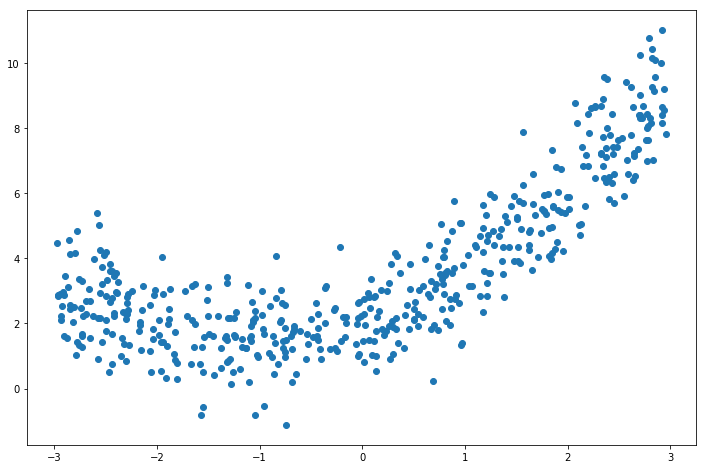

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(X,y,'o')
plt.show()

Creating polynomial features

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10,include_bias=False)

In [43]:
X_poly = poly_features.fit_transform(X)

In [44]:
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845,  0.32108831, -0.2417022 ,
        0.18194358, -0.13695972,  0.1030977 , -0.07760775,  0.05841996])

#### Fitting regression model without introducing penalty term.

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [46]:
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
for i in lin_reg.coef_.tolist():
    print(i)

[0.8674770361904215, 1.0191128938064997, 0.2452331875593785, -0.4872166179095889, -0.08696376400061664, 0.1579796724057347, 0.011054015313317123, -0.020839658308308577, -0.0004568741150283717, 0.0009523724390923805]


#### Fitting ridge regression model.

In ridge regression we add a regularization term to the cost function which is basically half the square of the l2 norm of the weight vector.

In [48]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")

In [49]:
ridge_reg.fit(X_poly,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [50]:
for i in ridge_reg.coef_.tolist():
    print(i)

[0.8376422438533191, 0.8401780599521961, 0.274828803542213, -0.342164685732847, -0.09682903236990689, 0.11459044950221034, 0.012391316377178113, -0.015397288361364423, -0.0005204286272335443, 0.0007096495883296032]


#### Fitting lasso regression.

In lasso regression l1 norm of weight vector is added to the cost function.

In [51]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
for i in lasso_reg.coef_.tolist():
    print(i)

0.6241432791623398
0.0
0.15564750411054973
0.14989858395783254
-0.003974020610909415
-0.008977339302313554
-0.003571011107244879
-0.0011411098113847024
0.0003044174585977322
9.360332503101426e-05


#### Fitting Elasticnet model.

Elasticnet is a combination of both ridge and lasso regression.

In [53]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X_poly,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
for i in elastic_net.coef_.tolist():
    print(i)

0.5851755409750358
0.09695157196901293
0.23319381157494792
0.125644699850202
-0.026608079226094022
-0.009087204714772073
-0.0016374634589007221
-0.0006902460482992544
0.0002739123854998815
6.471575740938295e-05


When l1_ratio is 0 then elasticnet is simply ridge regression and when l1_rato is 1 then elasticnet is lasso regression.